In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load CSVs
month_df = pd.read_csv("/Users/siddarthnachannagari/Modelz.io/Modelz.io/llm_models_month.csv", skiprows=1)
week_df = pd.read_csv("/Users/siddarthnachannagari/Modelz.io/Modelz.io/llm_models_week_full.csv", skiprows=1)

# Convert token and cost values
def clean_df(df):
    df = df.copy()
    df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]
    df["total_tokens_used"] = df["total_tokens_used"].str.replace("T", "e12").str.replace("B", "e9").astype(float)
    df["usd_spent"] = df["usd_spent"].replace('[\$,]', '', regex=True).astype(float)
    return df

month_df = clean_df(month_df)
week_df = clean_df(week_df)

# Add period labels
month_df["period"] = "Month"
week_df["period"] = "Week"

# Combine for comparison
combined_df = pd.concat([month_df, week_df])


/var/folders/nd/vz39pkrs2r9bwv9tg2ysjr_40000gn/T/ipykernel_30007/4173829663.py:7: UserWarning: Glyph 128290 (\N{INPUT SYMBOL FOR NUMBERS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Library/Python/3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128290 (\N{INPUT SYMBOL FOR NUMBERS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


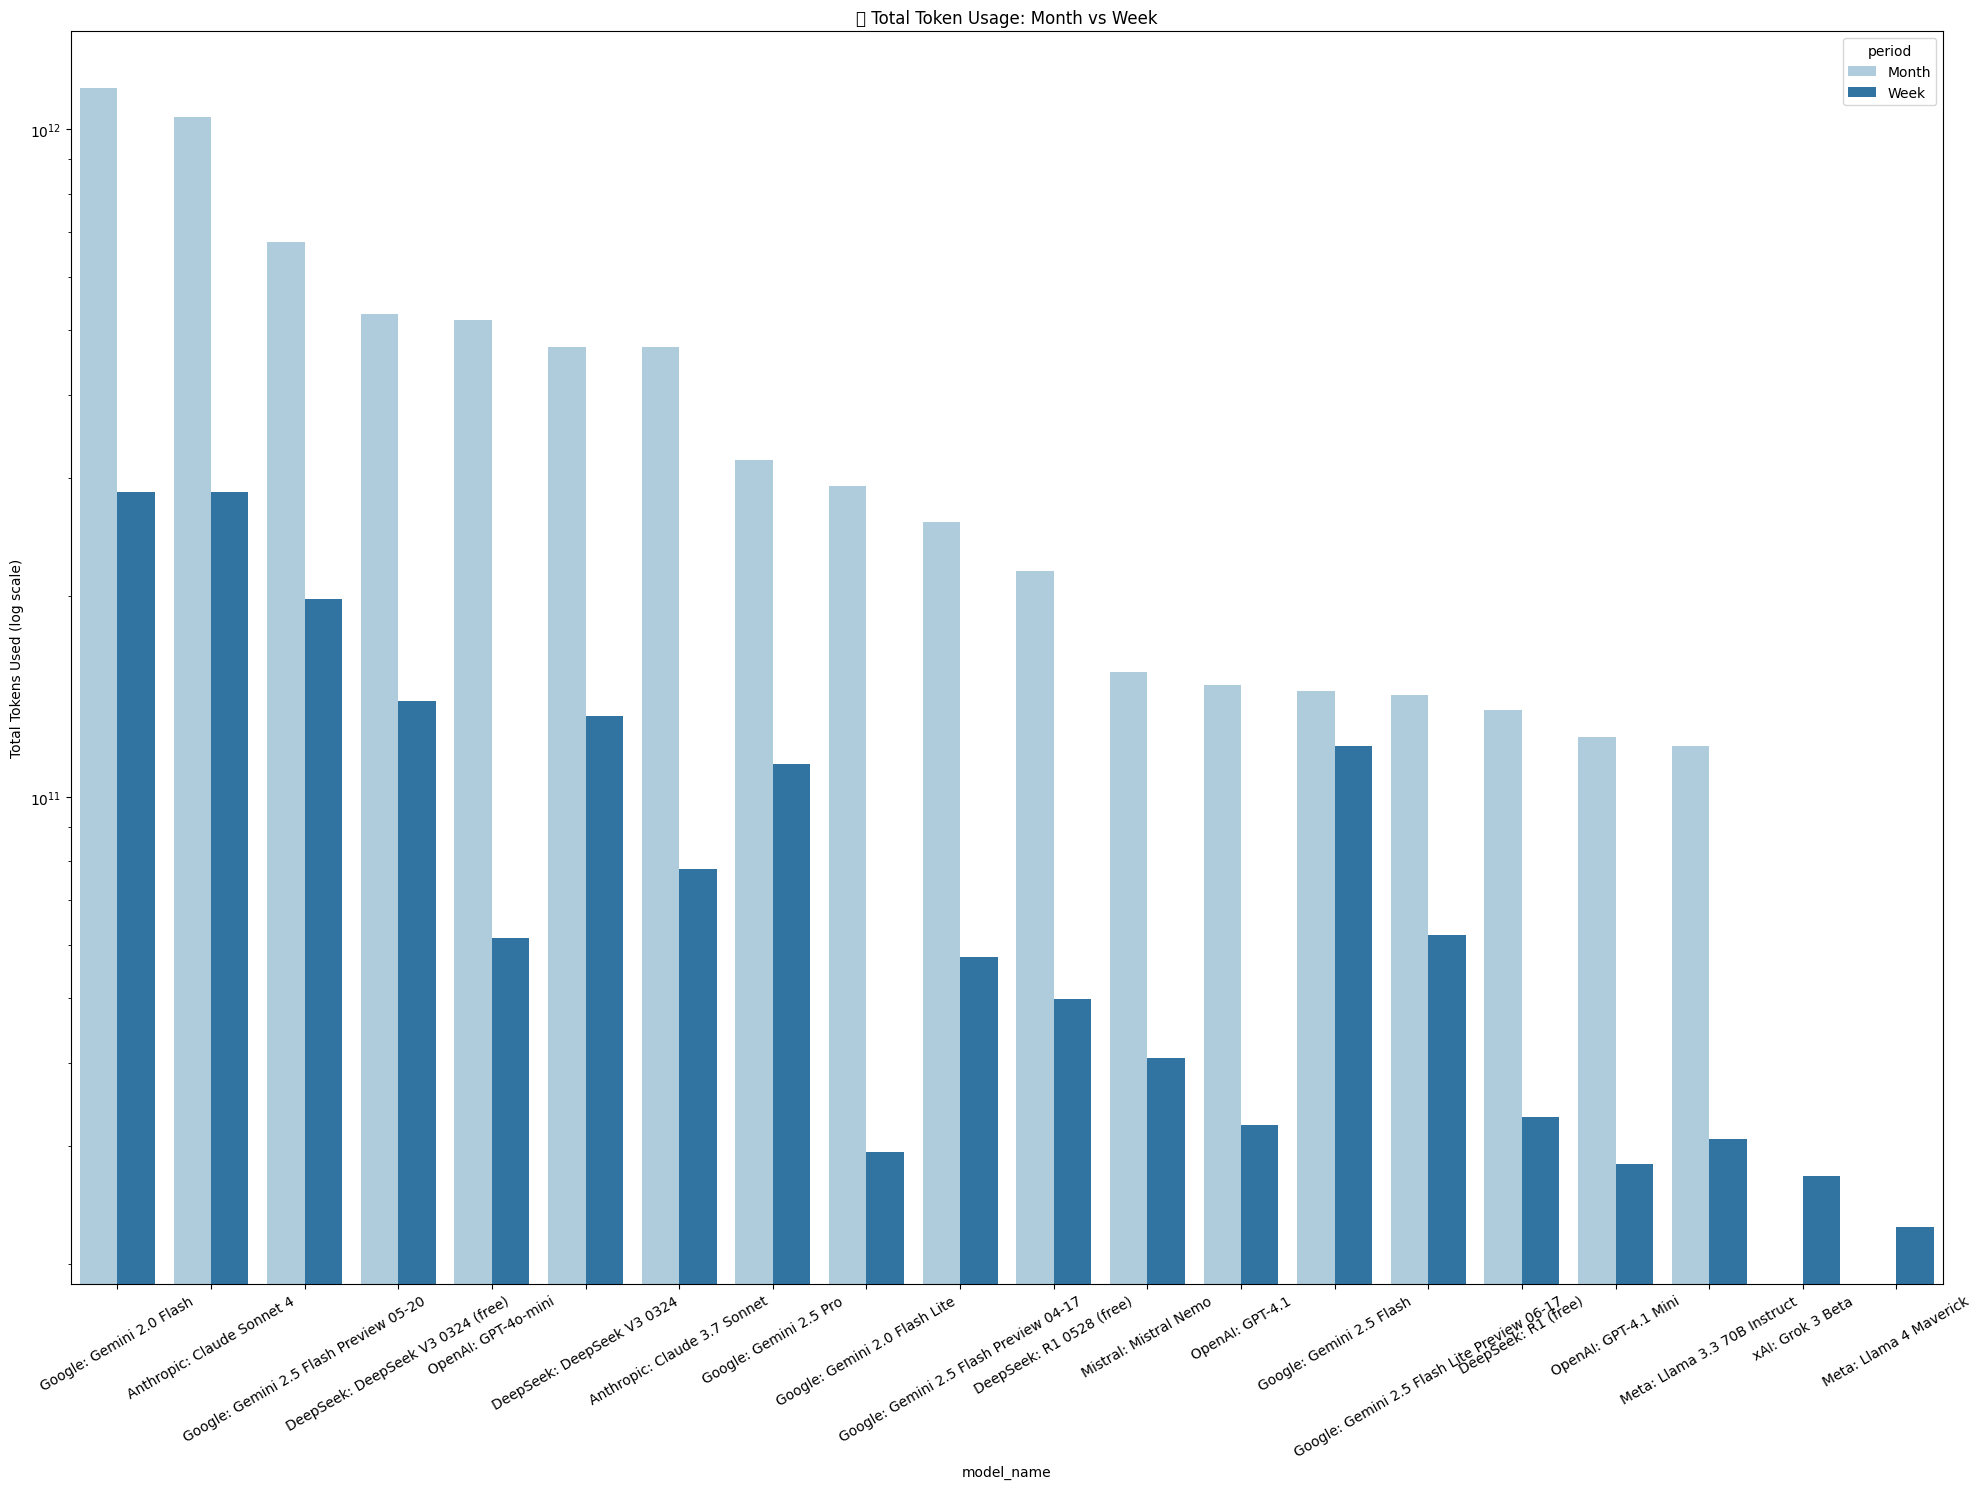

In [54]:
plt.figure(figsize=(20,15))
sns.barplot(data=combined_df, x="model_name", y="total_tokens_used", hue="period", palette="Paired")
plt.yscale("log")
plt.ylabel("Total Tokens Used (log scale)")
plt.title("🔢 Total Token Usage: Month vs Week")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


/var/folders/nd/vz39pkrs2r9bwv9tg2ysjr_40000gn/T/ipykernel_30007/1004199767.py:6: UserWarning: Glyph 128184 (\N{MONEY WITH WINGS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Library/Python/3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128184 (\N{MONEY WITH WINGS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


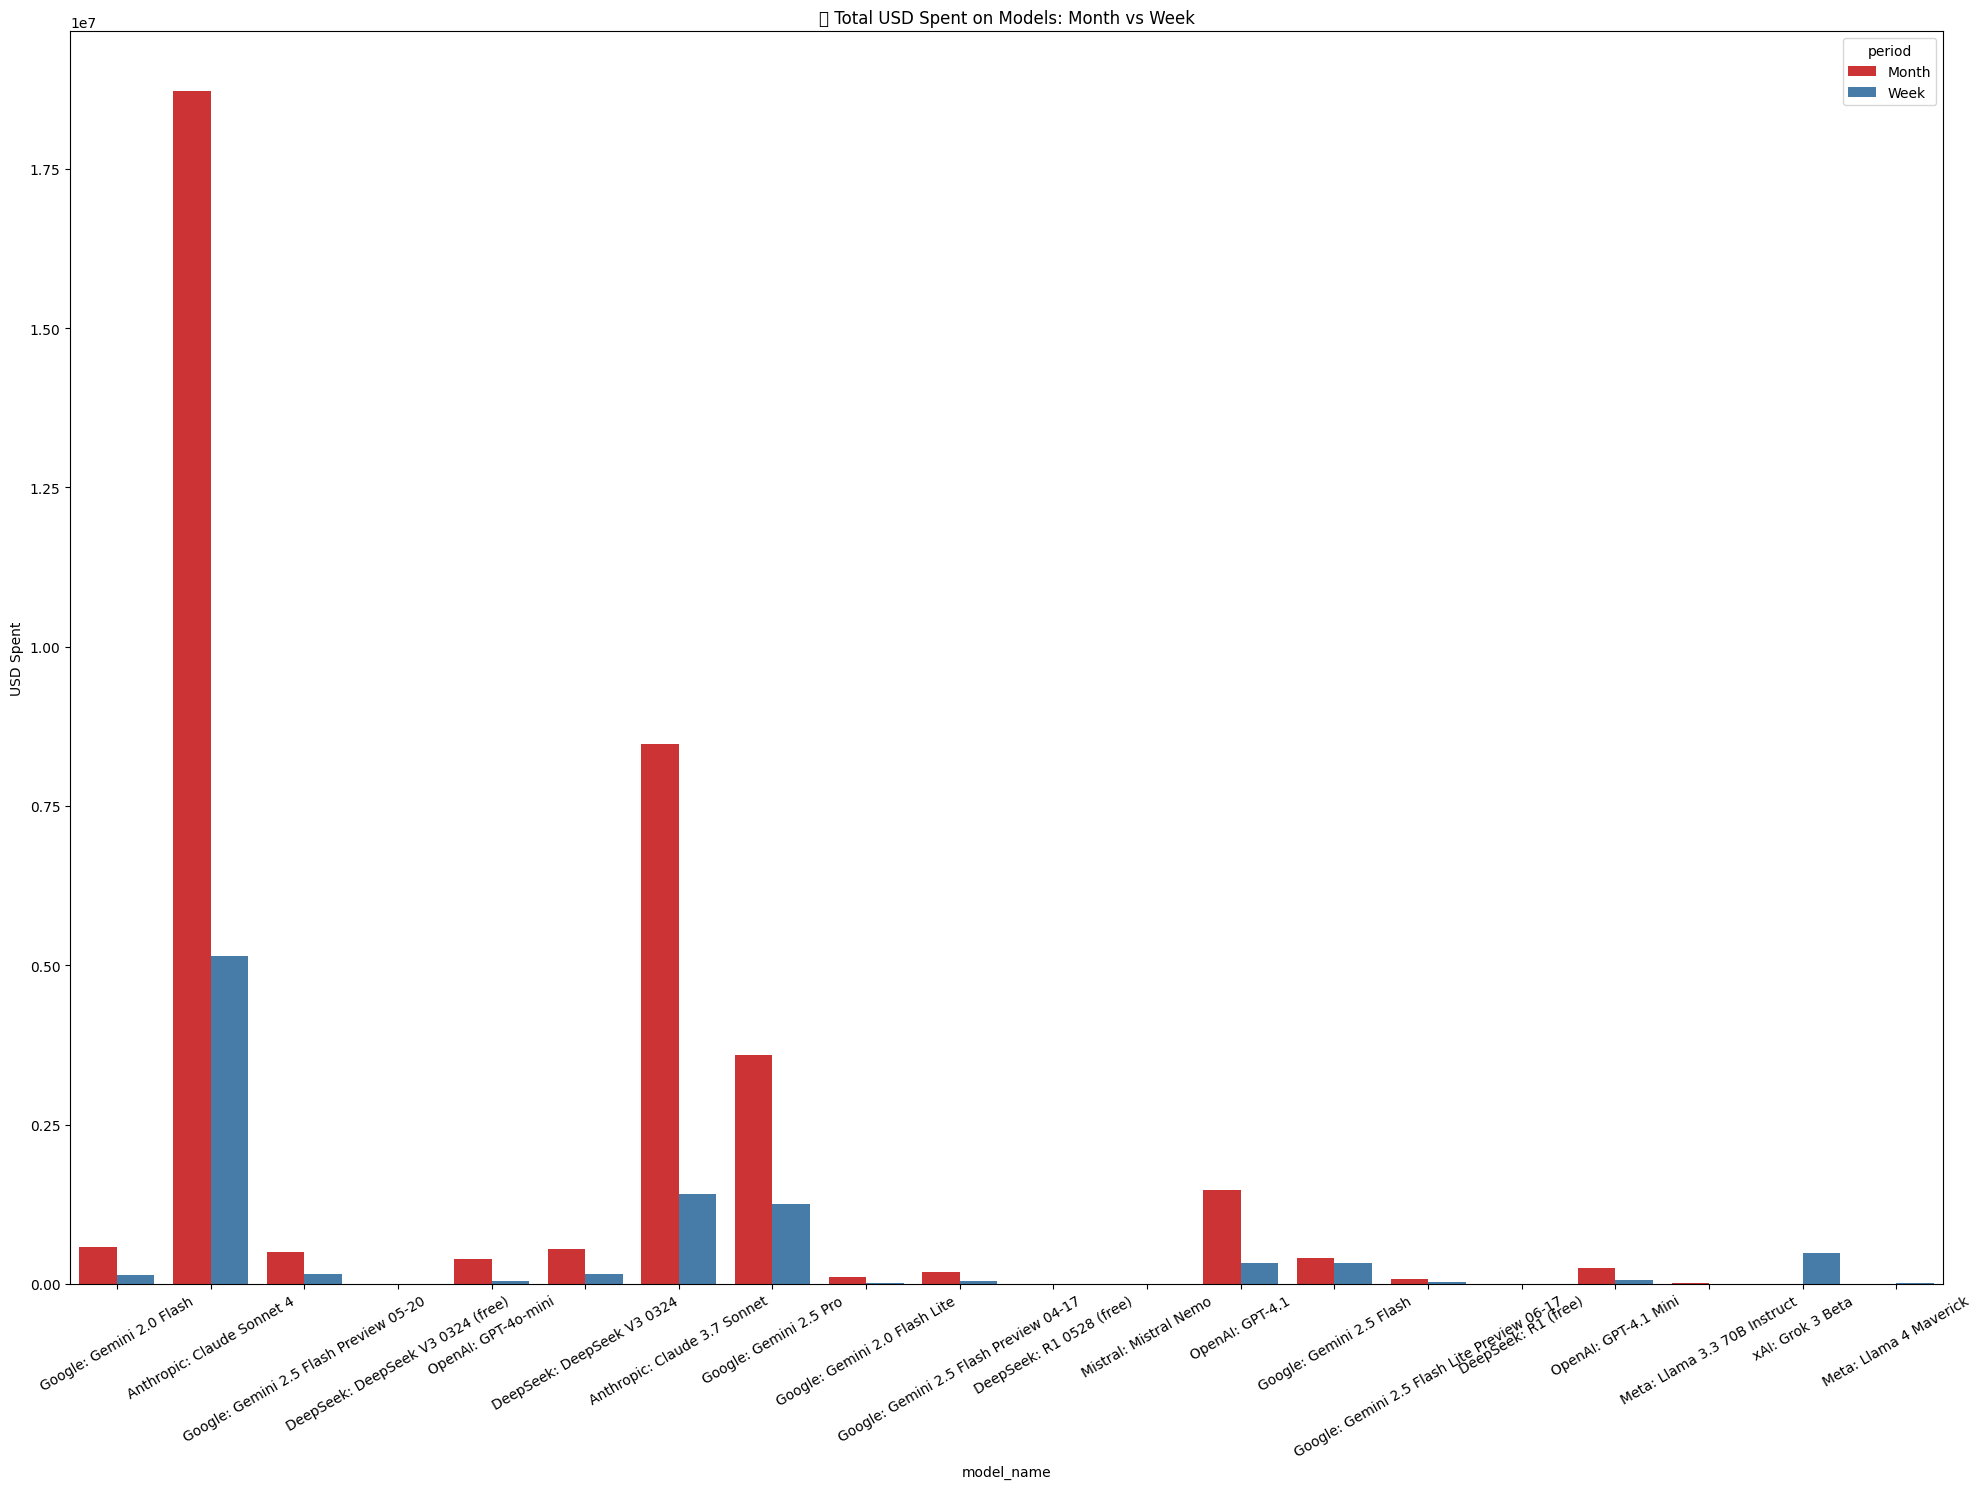

In [55]:
plt.figure(figsize=(20,15))
sns.barplot(data=combined_df, x="model_name", y="usd_spent", hue="period", palette="Set1")
plt.ylabel("USD Spent")
plt.title("💸 Total USD Spent on Models: Month vs Week")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()



In [56]:
combined_df = combined_df.reset_index(drop=True)

# Check columns
print(combined_df.columns)

# Aggregate data to avoid duplicates causing issues
agg_df = combined_df.groupby(["model_name", "period"], as_index=False).agg({"tokens_per_usd": "mean"})

plt.figure(figsize=(12, 6))
sns.barplot(data=agg_df, x="model_name", y="tokens_per_usd", hue="period")
plt.ylabel("Tokens per USD")
plt.title("📈 Cost Efficiency: Tokens per Dollar Spent")
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()


Index(['model_name', 'tokens', 'input_tokens_cost', 'output_tokens_cost',
       'total_tokens_used', 'usd_per_million_tokens', 'usd_spent', 'period'],
      dtype='object')


KeyError: "Column(s) ['tokens_per_usd'] do not exist"

/var/folders/nd/vz39pkrs2r9bwv9tg2ysjr_40000gn/T/ipykernel_30007/3998571693.py:39: UserWarning: Glyph 128290 (\N{INPUT SYMBOL FOR NUMBERS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Library/Python/3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128290 (\N{INPUT SYMBOL FOR NUMBERS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


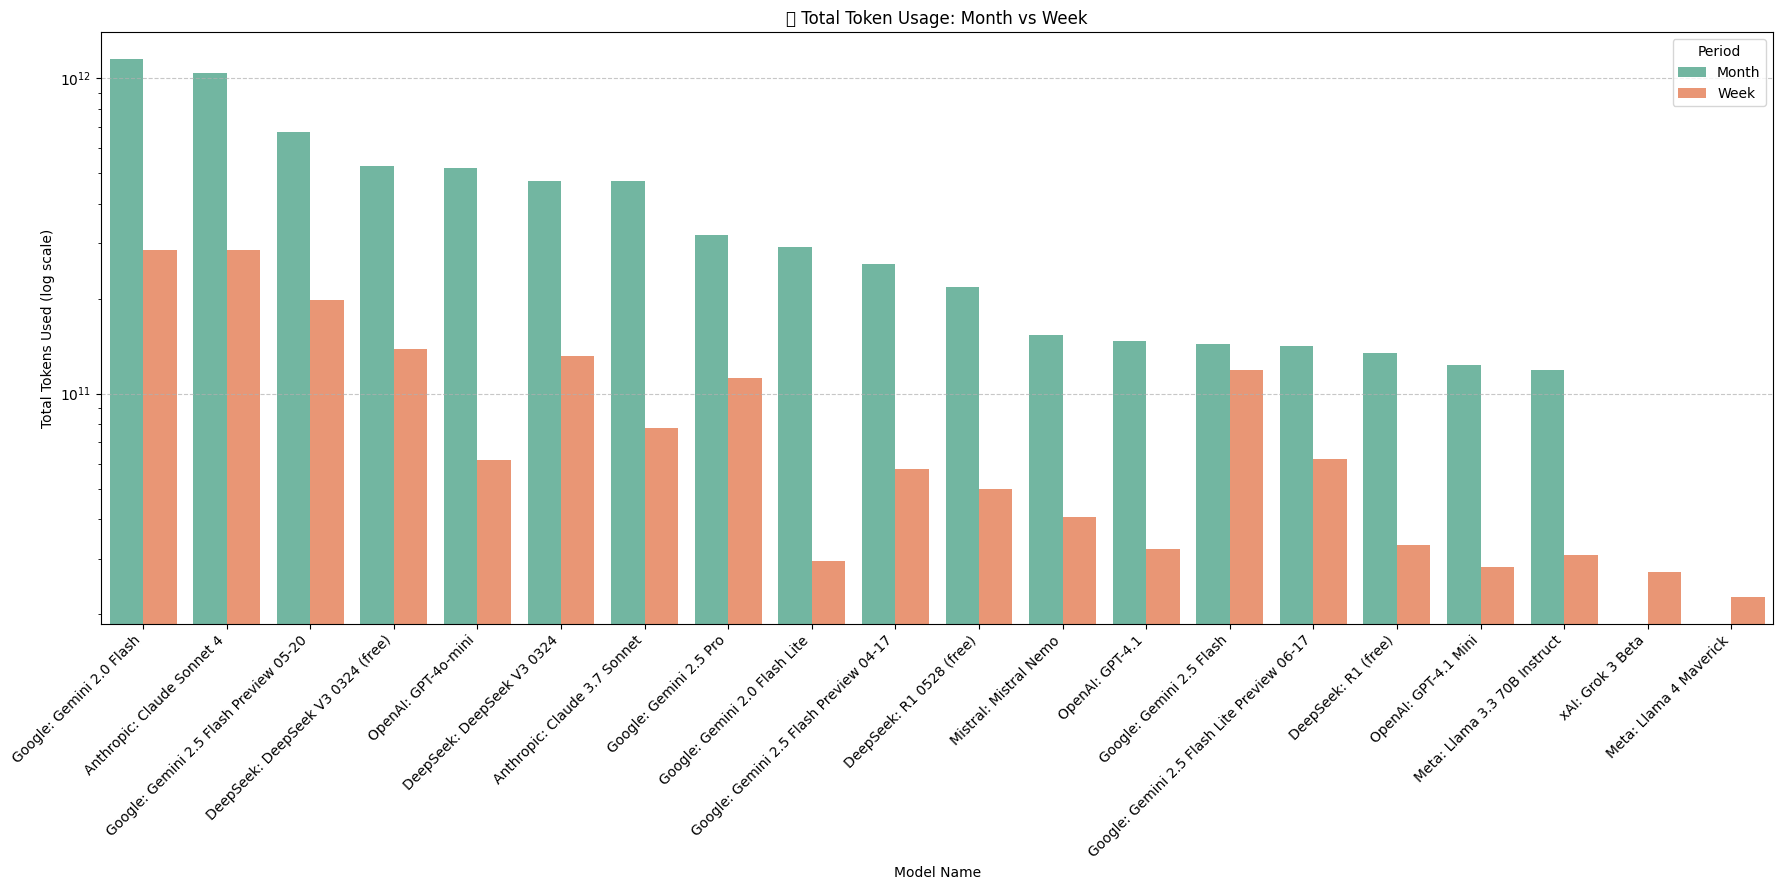

/var/folders/nd/vz39pkrs2r9bwv9tg2ysjr_40000gn/T/ipykernel_30007/3998571693.py:51: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Library/Python/3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


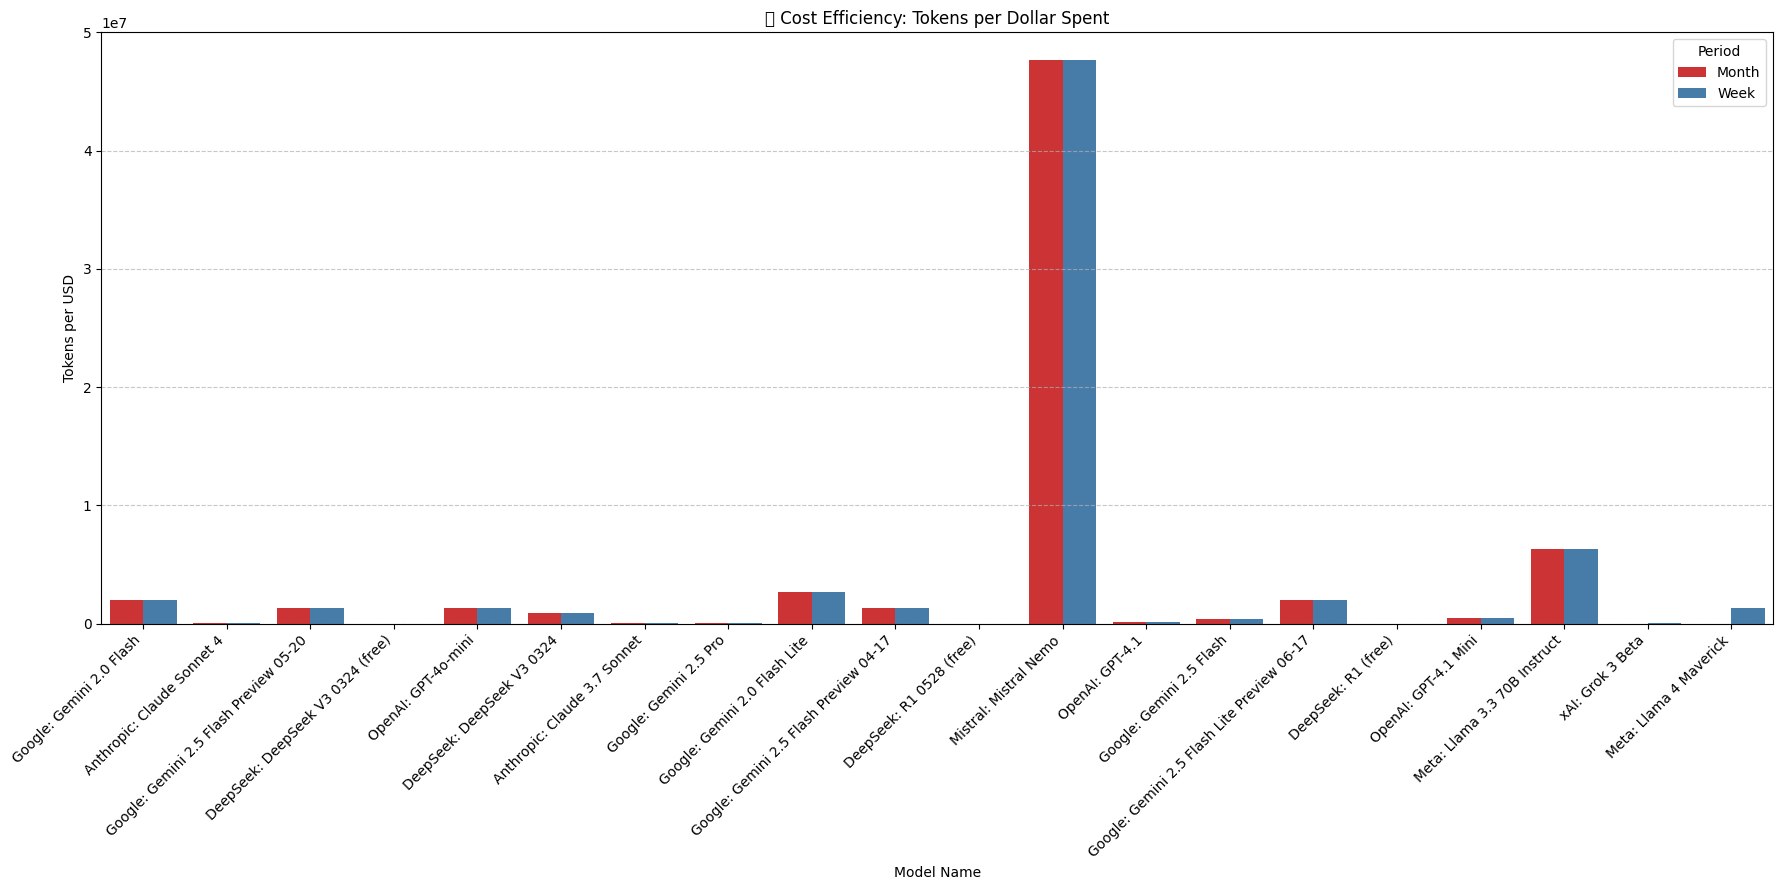

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load CSVs (skiprows=1 as you had)
month_df = pd.read_csv("/Users/siddarthnachannagari/Modelz.io/Modelz.io/llm_models_month.csv", skiprows=1)
week_df = pd.read_csv("/Users/siddarthnachannagari/Modelz.io/Modelz.io/llm_models_week_full.csv", skiprows=1)

# Cleaning function
def clean_df(df):
    df = df.copy()
    df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]
    df["total_tokens_used"] = df["total_tokens_used"].str.replace("T", "e12").str.replace("B", "e9").astype(float)
    df["usd_spent"] = df["usd_spent"].replace('[\$,]', '', regex=True).astype(float)
    return df

month_df = clean_df(month_df)
week_df = clean_df(week_df)

# Add period label
month_df["period"] = "Month"
week_df["period"] = "Week"

# Combine DataFrames
combined_df = pd.concat([month_df, week_df], ignore_index=True)

# Calculate tokens per USD (avoid division by zero)
combined_df["tokens_per_usd"] = combined_df["total_tokens_used"] / combined_df["usd_spent"].replace(0, pd.NA)

# Plot 1: Total Tokens Used (log scale)
plt.figure(figsize=(18, 9))
sns.barplot(data=combined_df, x="model_name", y="total_tokens_used", hue="period", palette="Set2")
plt.yscale("log")
plt.ylabel("Total Tokens Used (log scale)")
plt.xlabel("Model Name")
plt.title("🔢 Total Token Usage: Month vs Week")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Period")
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot 2: Tokens per USD (cost efficiency)
plt.figure(figsize=(18, 9))
sns.barplot(data=combined_df, x="model_name", y="tokens_per_usd", hue="period", palette="Set1")
plt.ylabel("Tokens per USD")
plt.xlabel("Model Name")
plt.title("📈 Cost Efficiency: Tokens per Dollar Spent")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Period")
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
import pandas as pd

# Load CSVs (skip first row)
month_df = pd.read_csv("/Users/siddarthnachannagari/Modelz.io/Modelz.io/llm_models_month.csv", skiprows=1)
week_df = pd.read_csv("/Users/siddarthnachannagari/Modelz.io/Modelz.io/llm_models_week_full.csv", skiprows=1)

print("=== Month Data ===")
print(month_df.to_string(index=False))  # Print full table without index

print("\n=== Week Data ===")
print(week_df.to_string(index=False))   # Same here


=== Month Data ===
                                 model_name  tokens input_tokens_cost output_tokens_cost total_tokens_used usd_per_million_tokens      usd_spent
                   Google: Gemini 2.0 Flash 1048576             $0.10              $0.40             1.15T                $0.5000    $575,000.00
                 Anthropic: Claude Sonnet 4  200000                $3                $15             1.04T               $18.0000 $18,720,000.00
     Google: Gemini 2.5 Flash Preview 05-20 1048576             $0.15              $0.60              676B                $0.7500    $507,000.00
          DeepSeek: DeepSeek V3 0324 (free)  163840              $0.0               $0.0              529B                $0.0000          $0.00
                        OpenAI: GPT-4o-mini  128000             $0.15              $0.60              518B                $0.7500    $388,500.00
                 DeepSeek: DeepSeek V3 0324  163840             $0.28              $0.88              472B     

In [57]:
!pip install altair

In [58]:
import pandas as pd
import altair as alt

# --- Data Loading and Cleaning ---
# Load the datasets, specifying header=1 to correctly parse the header
# Note: Using the file names directly as they are accessible in the environment
df_month = pd.read_csv('llm_models_month.csv', header=1)
df_week = pd.read_csv('llm_models_week_full.csv', header=1)

# Function to clean and convert 'total_tokens_used' to numeric (in billions)
def convert_tokens_to_numeric(total_tokens_used):
    if isinstance(total_tokens_used, str):
        total_tokens_used = total_tokens_used.strip()
        if 'T' in total_tokens_used:
            return float(total_tokens_used.replace('T', '')) * 1e12 / 1e9 # Convert to billions
        elif 'B' in total_tokens_used:
            return float(total_tokens_used.replace('B', ''))
    return float(total_tokens_used) # For values already numeric or without suffix

# Function to clean and convert currency to float
def convert_currency_to_float(currency_str):
    if isinstance(currency_str, str):
        return float(currency_str.replace('$', '').replace(',', ''))
    return float(currency_str)

# Apply cleaning and conversion to df_month
df_month['total_tokens_used'] = df_month['total_tokens_used'].apply(convert_tokens_to_numeric)
df_month['usd_spent'] = df_month['usd_spent'].apply(convert_currency_to_float)
df_month['usd_per_million_tokens'] = df_month['usd_per_million_tokens'].apply(convert_currency_to_float)
df_month['input_tokens_cost'] = df_month['input_tokens_cost'].apply(convert_currency_to_float)
df_month['output_tokens_cost'] = df_month['output_tokens_cost'].apply(convert_currency_to_float)


# Apply cleaning and conversion to df_week
df_week['total_tokens_used'] = df_week['total_tokens_used'].apply(convert_tokens_to_numeric)
df_week['usd_spent'] = df_week['usd_spent'].apply(convert_currency_to_float)
df_week['usd_per_million_tokens'] = df_week['usd_per_million_tokens'].apply(convert_currency_to_float)
df_week['input_tokens_cost'] = df_week['input_tokens_cost'].apply(convert_currency_to_float)
df_week['output_tokens_cost'] = df_week['output_tokens_cost'].apply(convert_currency_to_float)

# Select relevant columns for plotting and rename for clarity
df_month_plot = df_month[['model_name', 'usd_spent', 'total_tokens_used', 'usd_per_million_tokens']].copy()
df_month_plot.rename(columns={'usd_spent': 'USD Spent', 'total_tokens_used': 'Total Tokens Used (Billions)', 'usd_per_million_tokens': 'USD per Million Tokens'}, inplace=True)
df_month_plot['Period'] = 'Month of June'

df_week_plot = df_week[['model_name', 'usd_spent', 'total_tokens_used', 'usd_per_million_tokens']].copy()
df_week_plot.rename(columns={'usd_spent': 'USD Spent', 'total_tokens_used': 'Total Tokens Used (Billions)', 'usd_per_million_tokens': 'USD per Million Tokens'}, inplace=True)
df_week_plot['Period'] = 'Week of June 25th - July 1st'

# Combine the two dataframes
df_combined = pd.concat([df_month_plot, df_week_plot])

# --- Visualization with Altair ---

# Create a base chart
base = alt.Chart(df_combined).encode(
    x=alt.X('model_name:N', title='LLM Model Name', sort='-y'), # Sort by USD Spent descending
    y=alt.Y('USD Spent:Q', title='USD Spent ($)'),
    color=alt.Color('Period:N', title='Time Period', scale=alt.Scale(range=['#4c78a8', '#f58518'])), # Custom colors
    tooltip=[
        alt.Tooltip('model_name', title='Model'),
        alt.Tooltip('Period', title='Time Period'),
        alt.Tooltip('USD Spent', title='USD Spent', format='$,.2f'),
        alt.Tooltip('Total Tokens Used (Billions)', title='Tokens Used (Billions)', format='.2f'),
        alt.Tooltip('USD per Million Tokens', title='Cost per Million Tokens', format='$,.4f')
    ]
).properties(
    title='Comparison of LLM Model Spending: Monthly vs. Weekly'
)

# Create the bar chart
bars = base.mark_bar().encode()

# Add text labels on top of the bars
text = base.mark_text(
    align='left',
    baseline='middle',
    dx=3 # Nudge text to the right
).encode(
    text=alt.Text('USD Spent:Q', format='$,.0f'), # Format USD as currency without decimals
    color=alt.value('black') # Set text color to black
)

# Combine bars and text, and make it interactive
chart = (bars + text).interactive().properties(
    height=400,
    width=800
)

# Save the chart
chart.save('llm_model_spending_comparison_enhanced.json')


ModuleNotFoundError: No module named 'altair'